In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### Data creating

In [2]:
set1 = np.random.normal(0, 1, (1000, 2))
set1.shape

(1000, 2)

In [3]:
set2 = np.random.normal(5, 1, (1000, 2))
set2.shape

(1000, 2)

In [4]:
set3 = np.random.normal(10, 1, (1000, 2))
set3.shape

(1000, 2)

<br>

### Plot Representation

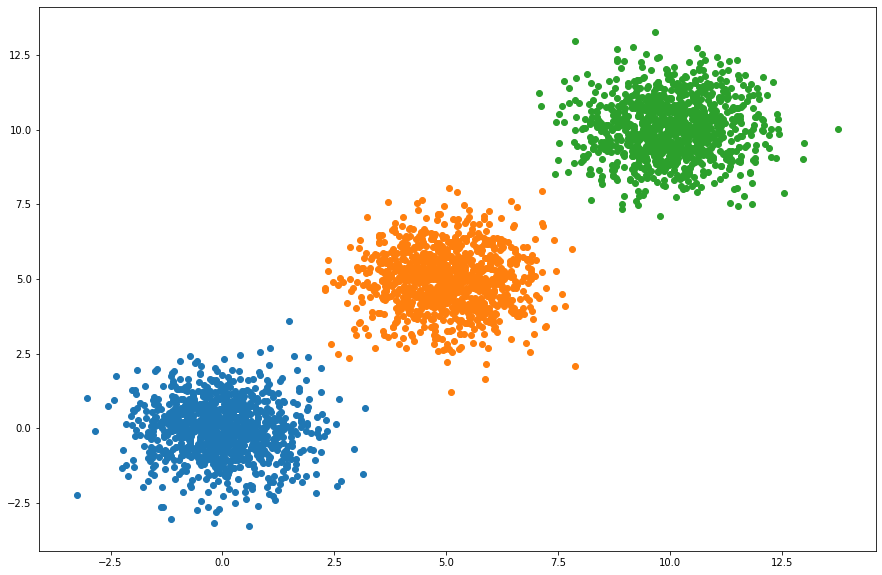

In [5]:
plt.figure(figsize=((15,10)))

plt.scatter(set1[:, 0], set1[:, 1])
plt.scatter(set2[:, 0], set2[:, 1])
plt.scatter(set3[:, 0], set3[:, 1])

plt.show()

<br>

### Transforming to dataframe

In [6]:
df = pd.DataFrame(set1, columns = ['x', 'y'])
df['type'] = pd.Series(np.array([0 for _ in range(len(set1))]))

df2 =pd.DataFrame(set2, columns = ['x', 'y'])
df2['type'] = pd.Series(np.array([1 for _ in range(len(set2))]))

df3 =pd.DataFrame(set3, columns = ['x', 'y'])
df3['type'] = pd.Series(np.array([2 for _ in range(len(set3))]))

In [7]:
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)

In [8]:
df = df.sample(frac=1).reset_index(drop=True)
df

,x,y,type
0,10.921893,10.460166,2
1,4.553343,5.318838,1
2,0.622750,1.204470,0
3,5.604812,5.299540,1
4,7.712855,8.593909,2
...,...,...,...
2995,4.721157,4.561894,1
2996,9.550694,10.924970,2
2997,1.189344,0.278295,0
2998,4.166991,4.954505,1


<br>

### Functions for model represinting

In [9]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [10]:
def plot_model(X, y, model):
    fig, ax = plt.subplots(figsize=(15, 10))
    
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    plt.show()

<br>

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [12]:
model.fit(df[df.columns[:2]].values, df[df.columns[2]].values)

LogisticRegression()

In [13]:
model.coef_

array([[-2.30011305, -1.92910677],
       [ 0.04744702, -0.05095768],
       [ 2.25266604,  1.98006445]])

In [14]:
model.intercept_

array([ 17.57515259,   7.20475627, -24.77990886])

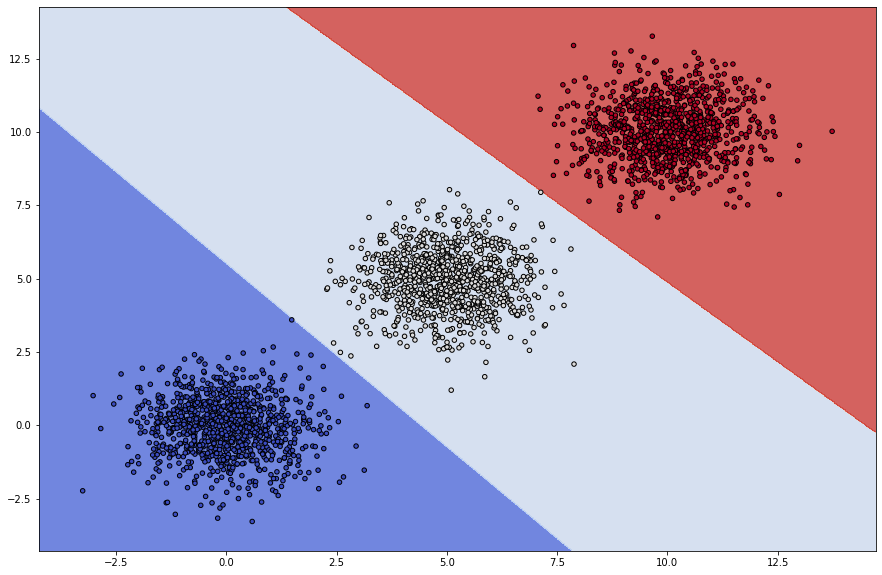

In [15]:
plot_model(df.drop(columns=['type']).values, df['type'].values, model)

<AxesSubplot:xlabel='x', ylabel='type'>

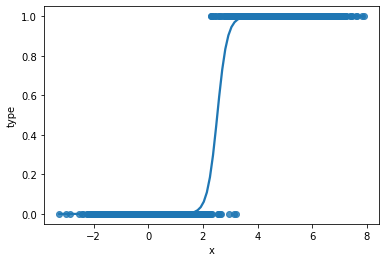

In [16]:
sns.regplot(x='x', y='type', data=df[df.type !=2], logistic=True, ci=None)

<br>

### SVC

In [17]:
from sklearn.svm import SVC

In [18]:
model2 = SVC(kernel='linear')
model2.fit(df[['x','y']].values, df['type'].values)

SVC(kernel='linear')

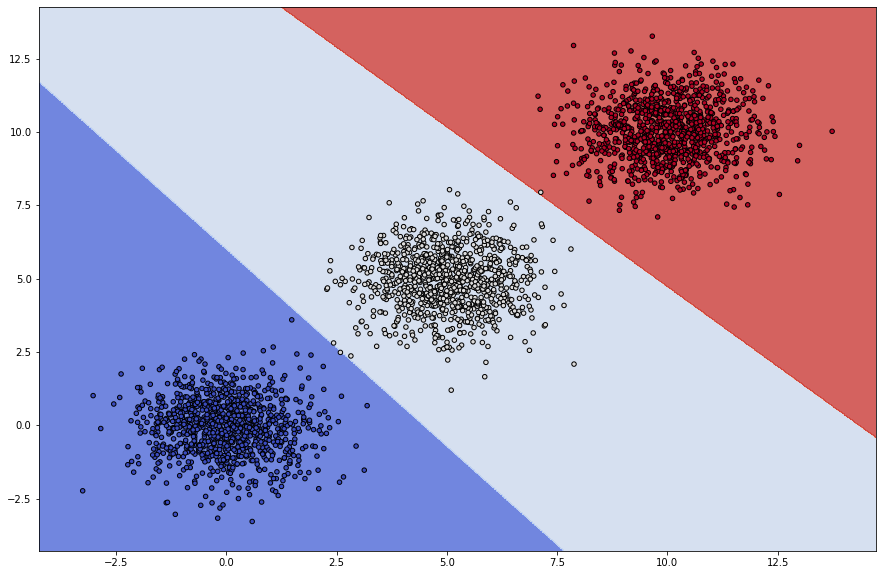

In [19]:
plot_model(df.drop(columns=['type']).values, df['type'].values, model2)